In [1]:
import os
import evautils
from evautils import mommadragonnutils
from evautils import dirutils
from evautils import osutils
from evautils import match_gc_content

In [2]:
REGION_SIZE = 400
CELL_LINE = 'A549'
POS_PREFIX = CELL_LINE +'_' + str(REGION_SIZE)
NEG_PREFIX = 'universal_dnase_' + str(REGION_SIZE)
MASTER_DIR='/users/eprakash/benchmarking/A549/400bp_hg38'
TRAINING_BASE_DIR=MASTER_DIR+'/training'
PREPROCESSING_BASE_DIR = MASTER_DIR+'/preprocessing'
MOMMA_DRAGONN='/users/eprakash/template'
WEIGHTFILE='/users/eprakash/projects/benchmarking/newdata/A549/models/deepseabeluga/adaptDeepSeaKerasModel.A549.h5'
IMPLANTED_POS_BED_FILE = PREPROCESSING_BASE_DIR + '/' + 'implanted_' + POS_PREFIX + '.bed.gz'
MATCHED_NEG_BED_FILE = PREPROCESSING_BASE_DIR + '/' + 'matched_' + 'no_' + CELL_LINE + '_' + NEG_PREFIX + '.bed.gz'

In [3]:
dirutils.copyDir(MOMMA_DRAGONN, TRAINING_BASE_DIR)
os.system('cp ' + WEIGHTFILE + ' ' + TRAINING_BASE_DIR)
MOMMA_DRAGONN=TRAINING_BASE_DIR+'/'+'momma_dragonn'

In [4]:
mommadragonnutils.splitDatasets(IMPLANTED_POS_BED_FILE, MATCHED_NEG_BED_FILE, TRAINING_BASE_DIR+'/'+POS_PREFIX, TRAINING_BASE_DIR+'/'+NEG_PREFIX)

#Loading /users/eprakash/benchmarking/A549/400bp_hg38/preprocessing/implanted_A549_400.bed.gz ...
#Loaded 143217 sequences from /users/eprakash/benchmarking/A549/400bp_hg38/preprocessing/implanted_A549_400.bed.gz
#Loading /users/eprakash/benchmarking/A549/400bp_hg38/preprocessing/matched_no_A549_universal_dnase_400.bed.gz ...
#Loaded 143217 sequences from /users/eprakash/benchmarking/A549/400bp_hg38/preprocessing/matched_no_A549_universal_dnase_400.bed.gz
TOTAL POS: 143217
TOTAL NEG: 143217
POS TRAIN: 114574.0
NEG TRAIN: 114574.0
POS VALID: 28643.0
NEG VALID: 28643.0


#Loading /users/eprakash/benchmarking/A549/400bp_hg38/training/A549_400_train.bed.gz ...
#Loaded 114574 sequences from /users/eprakash/benchmarking/A549/400bp_hg38/training/A549_400_train.bed.gz
#Loading /users/eprakash/benchmarking/A549/400bp_hg38/training/universal_dnase_400_train.bed.gz ...
#Loaded 114574 sequences from /users/eprakash/benchmarking/A549/400bp_hg38/training/universal_dnase_400_train.bed.gz


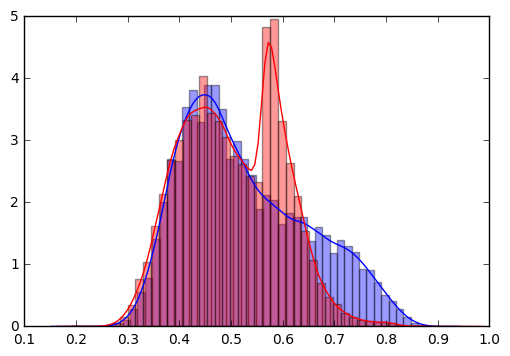

#Loading /users/eprakash/benchmarking/A549/400bp_hg38/training/A549_400_valid.bed.gz ...
#Loaded 28642 sequences from /users/eprakash/benchmarking/A549/400bp_hg38/training/A549_400_valid.bed.gz
#Loading /users/eprakash/benchmarking/A549/400bp_hg38/training/universal_dnase_400_valid.bed.gz ...
#Loaded 28642 sequences from /users/eprakash/benchmarking/A549/400bp_hg38/training/universal_dnase_400_valid.bed.gz


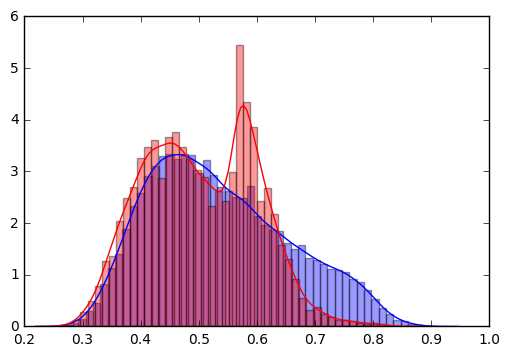

In [5]:
match_gc_content.gc_sanity_check(TRAINING_BASE_DIR+'/'+POS_PREFIX+'_train.bed.gz', TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_train.bed.gz')
match_gc_content.gc_sanity_check(TRAINING_BASE_DIR+'/'+POS_PREFIX+'_valid.bed.gz', TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_valid.bed.gz')

In [6]:
mommadragonnutils.fillPlaceholders(MOMMA_DRAGONN+'/examples/fasta_sequential_model/config/hyperparameter_configs_list.yaml',
                                   WEIGHTFILE,
                                   TRAINING_BASE_DIR+'/'+POS_PREFIX+'_train.bed.gz',
                                   TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_train.bed.gz',
                                   TRAINING_BASE_DIR+'/'+POS_PREFIX+'_valid.bed.gz',
                                   TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_valid.bed.gz')

In [7]:
mommadragonnutils.fillPlaceholders(MOMMA_DRAGONN+'/examples/fasta_sequential_model/config/valid_data_loader_config.yaml',
                                   WEIGHTFILE,
                                   TRAINING_BASE_DIR+'/'+POS_PREFIX+'_train.bed.gz',
                                   TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_train.bed.gz',
                                   TRAINING_BASE_DIR+'/'+POS_PREFIX+'_valid.bed.gz',
                                   TRAINING_BASE_DIR+'/'+NEG_PREFIX+'_valid.bed.gz')

In [8]:
md=MOMMA_DRAGONN+'/examples/fasta_sequential_model'
mommadragonnutils.runMD(md)

Using TensorFlow backend.
2020-01-05 09:39:31.562631: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-01-05 09:39:34.695020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1405] Found device 0 with properties:
name: GeForce GTX TITAN X major: 5 minor: 2 memoryClockRate(GHz): 1.076
pciBusID: 0000:09:00.0
totalMemory: 11.93GiB freeMemory: 11.82GiB
2020-01-05 09:39:34.695072: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1484] Adding visible gpu devices: 0
2020-01-05 09:39:35.141309: I tensorflow/core/common_runtime/gpu/gpu_device.cc:965] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-01-05 09:39:35.141363: I tensorflow/core/common_runtime/gpu/gpu_device.cc:971]      0
2020-01-05 09:39:35.141370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] 0:   N
2020-01-05 09:39:35.141974: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1097] Created TensorF